In [1]:
#%matplotlib inline
import numpy as np, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import sklearn, pandas
import librosa, librosa.display
import scipy.io.wavfile as wav
import scipy.signal as signal

In [2]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

## Load Audio

Load 30 seconds of an audio file:

In [3]:
filename_bed = 'bed.wav'
x_bed, sr_bed = librosa.load(filename_bed, sr=None)
print x_bed
print sr_bed

[-0.00024414 -0.00033569 -0.00033569 ...  0.00039673  0.00030518
  0.00048828]
16000


Play the audio

In [4]:
ipd.Audio(x_bed, rate=sr_bed)

Plot the time-domain waveform of the audio signals:

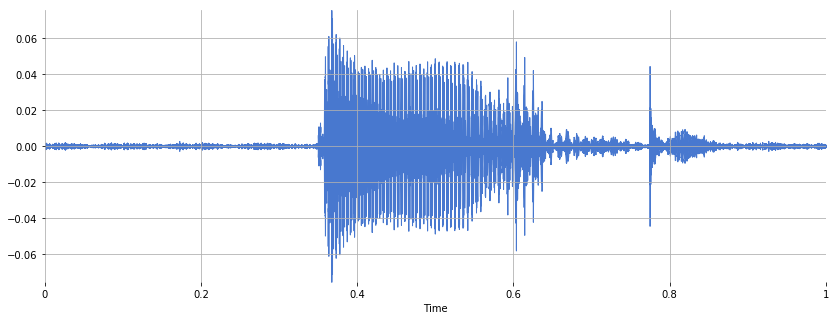

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_bed, sr_bed)

Compute the power melspectrogram:

In [6]:
S_bed = librosa.feature.melspectrogram(x_bed, sr=sr_bed, power=2.0)
print S_bed

[[9.64841504e-04 8.45004637e-04 1.76514621e-04 ... 1.86334810e-04
  2.15965585e-04 8.89806891e-04]
 [2.77297667e-03 9.92791265e-04 2.27953713e-04 ... 2.73466901e-04
  1.02568446e-03 1.02588316e-03]
 [1.03463207e-03 3.54709714e-04 1.08205120e-04 ... 1.84899002e-04
  4.51821563e-04 1.26420105e-03]
 ...
 [9.65850593e-08 8.37850730e-08 9.28161141e-08 ... 1.18474452e-07
  1.50587214e-07 2.85813057e-07]
 [5.50836883e-08 4.19364017e-08 3.56432678e-08 ... 3.57323105e-08
  3.11498590e-08 3.50255361e-08]
 [1.59910058e-08 1.33794113e-08 1.35965868e-08 ... 1.10232012e-08
  1.07733137e-08 9.24551879e-09]]


Convert amplitude to decibels:

In [7]:
Sdb_bed = librosa.power_to_db(S_bed)
print Sdb_bed

[[-30.15544023 -30.73140908 -37.53219316 ... -37.29706005 -36.6561545
  -30.50704235]
 [-25.57053784 -30.03142052 -36.42153329 ... -35.63095231 -29.88986223
  -29.889021  ]
 [-29.85214063 -34.50126918 -39.6575219  ... -37.33065433 -33.45033047
  -28.98183855]
 ...
 [-70.15090049 -70.76833347 -70.32376618 ... -69.2637529  -68.22211902
  -65.43917935]
 [-72.23549776 -72.23549776 -72.23549776 ... -72.23549776 -72.23549776
  -72.23549776]
 [-72.23549776 -72.23549776 -72.23549776 ... -72.23549776 -72.23549776
  -72.23549776]]


In [8]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(Sdb_bed, sr=sr_bed, x_axis='time', y_axis='mel')
plt.colorbar()

In [9]:
D = np.abs(librosa.stft(x_bed, n_fft=512))
print D

[[4.05933186e-02 6.05753204e-03 8.24638829e-03 ... 2.46862378e-02
  7.70192593e-02 7.55326822e-02]
 [7.24735707e-02 6.52691498e-02 4.62533720e-02 ... 6.15008771e-02
  3.95484082e-02 3.83188166e-02]
 [1.03950106e-01 5.44892214e-02 3.96705121e-02 ... 4.40465398e-02
  5.74771799e-02 5.67390136e-02]
 ...
 [1.08967739e-04 1.16674659e-04 8.78594656e-05 ... 8.72607416e-05
  1.02779413e-04 1.59544550e-04]
 [2.09749705e-04 2.17131179e-04 2.25086653e-04 ... 1.65157035e-04
  9.19245722e-05 1.40858929e-05]
 [1.90916660e-04 2.56932253e-05 2.50265759e-04 ... 1.30118235e-04
  3.57858007e-05 5.88206422e-05]]


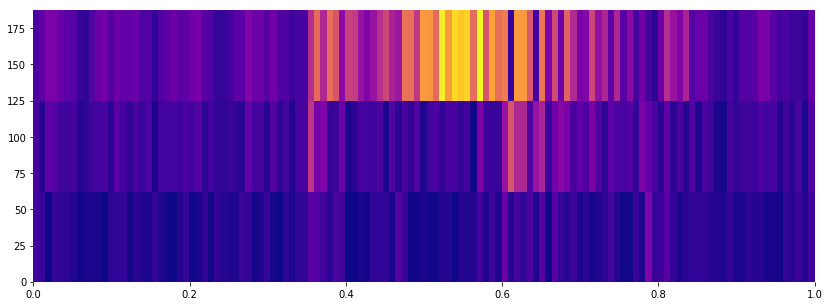

In [10]:
f, t, Zxx = signal.stft(x_bed, fs=sr_bed)

plt.pcolormesh(t, f[:4], np.abs(Zxx)[:4, :], cmap='plasma')

In [11]:
np.std(Zxx[1, :])

0.00046415778

In [12]:
Zxx[1, :].shape 

(126L,)

In [13]:
np.argmax(np.abs(Zxx[:10, :]))

1210

In [14]:
Zxx[:10, :].shape

(10L, 126L)

In [15]:
dbs = librosa.amplitude_to_db(D, ref=np.max)
print dbs
print dbs.shape

[[-40.867214 -57.390396 -54.71103  ... -45.18721  -35.30432  -35.47361 ]
 [-35.83271  -36.74215  -39.733437 ... -37.258682 -41.093727 -41.368065]
 [-32.699806 -38.310097 -41.066948 ... -40.15807  -37.846397 -37.95867 ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]
(257L, 126L)


In [16]:
librosa.display.specshow(dbs, y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

## Extracting features

Feature extractor

In [17]:
def featureExtractor(fileName):
    import numpy as np
    import librosa
    
    x, sr = librosa.load(fileName, sr=None)
    D = np.abs(librosa.stft(x, n_fft=512))
    dbs = librosa.amplitude_to_db(D, ref=np.max)
    
    return (
        np.count_nonzero(np.logical_and(dbs > -100, dbs < -90)), 
        np.count_nonzero(np.logical_and(dbs > -90, dbs < -80)), 
        np.count_nonzero(np.logical_and(dbs > -80, dbs < -70)), 
        np.count_nonzero(np.logical_and(dbs > -70, dbs < -60)), 
        np.count_nonzero(np.logical_and(dbs > -60, dbs < -50)), 
        np.count_nonzero(np.logical_and(dbs > -50, dbs < -40)), 
        np.count_nonzero(np.logical_and(dbs > -40, dbs < -30)), 
        np.count_nonzero(np.logical_and(dbs > -30, dbs < -20)), 
        np.count_nonzero(np.logical_and(dbs > -20, dbs < -10)), 
        np.count_nonzero(np.logical_and(dbs > -10, dbs < 0)),
        np.amax(dbs), 
        np.amin(dbs))

## Model Building

In [53]:
#Libraries used
import os
import re
import numpy as np
import pandas as pd
import scipy.io.wavfile as sw
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import glob

#Importing directory
final_dataset = pd.DataFrame()#Blank initial dataset 
classes = ['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy']

for i in range(len(classes)):
    file_names = glob.glob("D:\\ML materials\\" + classes[i] + "\\*.wav")
    for j in range(100):
        features = featureExtractor(file_names[j])
        features = pd.DataFrame(features)
        features["Target"] = i
        final_dataset = final_dataset.append(features)#rbind(final_dataset,features)

#Finalize dataset with the attributes and target
fd = final_dataset
y = fd.iloc[:,-1]
X = fd.iloc[:,:]

#Spliting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

type(y_train)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)

#Model Building

#SVM
model = svm.SVC(kernel = 'rbf', C = 1)
model1 = model.fit(X_train, y_train)
print model1.score(X_train, y_train)
predicted = model.predict(X_test)
print predicted
print accuracy_score(y_test, predicted)



C:\Users\oleksandr.krylyk\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:38: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


0.9998888888888889
[5 8 1 ... 9 0 9]
1.0
